In [182]:
# załadowanie bibliotek

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd

In [183]:
# załadowanie danych
import os 

path = r"C:\Users\piotr\Downloads\EiWD_lab_zadanie02\IHME_DAH_DATABASE_1990_2020_Y2021M09D22.CSV"
folder = r"C:\Users\piotr\Documents\Semestr 3\EiWD_zadanie_02_wykresy"

data = pd.read_csv(path, low_memory=False)
data.head()

,year,source,channel,recipient_isocode,recipient_country,gbd_location_id,wb_regioncode,wb_location_id,gbd_region,gbd_region_id,...,other_dah_20,rmh_dah_20,nch_dah_20,ncd_dah_20,hiv_dah_20,mal_dah_20,tb_dah_20,swap_hss_total_dah_20,oid_dah_20,unalloc_dah_20
0,1990,Australia,BIL_AUS,AGO,Angola,168,SSA,242,"Sub-Saharan Africa, Central",167.0,...,0,5,0,0,7,3,0,0,0,-
1,1990,Australia,BIL_AUS,BDI,Burundi,175,SSA,242,"Sub-Saharan Africa, Eastern",174.0,...,0,6,0,0,5,1,0,0,0,0
2,1990,Australia,BIL_AUS,BEN,Benin,200,SSA,242,"Sub-Saharan Africa, Western",199.0,...,0,6,0,0,5,2,0,0,0,0
3,1990,Australia,BIL_AUS,BFA,Burkina Faso,201,SSA,242,"Sub-Saharan Africa, Western",199.0,...,0,5,0,0,7,2,0,0,0,0
4,1990,Australia,BIL_AUS,BWA,Botswana,193,SSA,242,"Sub-Saharan Africa, Southern",192.0,...,0,1,0,0,23,-,0,0,0,-


In [184]:
num_data = data.select_dtypes(include='number')

num_data.describe()

,year,gbd_location_id,wb_location_id,gbd_region_id,gbd_superregion_id,elim_ch,prelim_est
count,384306.000000,384306.000000,384306.000000,383993.000000,383993.000000,384306.000000,384306.000000
mean,2008.127521,1765.935533,2240.752439,1745.812671,1733.144388,0.252052,0.014358
std,6.945191,8325.915434,9204.906147,8328.525983,8330.949734,0.434191,0.118963
min,1990.000000,1.000000,239.000000,1.000000,1.000000,0.000000,0.000000
25%,2004.000000,110.000000,241.000000,96.000000,64.000000,0.000000,0.000000
50%,2009.000000,169.000000,242.000000,159.000000,158.000000,0.000000,0.000000
75%,2014.000000,200.000000,242.000000,192.000000,166.000000,1.000000,0.000000
max,2020.000000,44598.000000,44621.000000,44598.000000,44598.000000,1.000000,1.000000


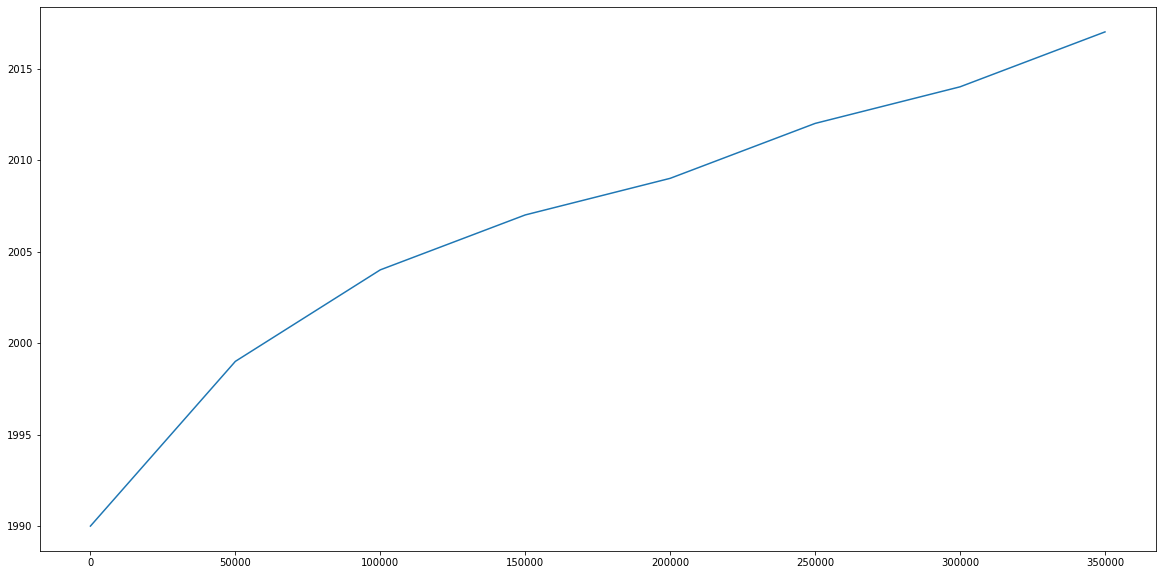

In [186]:
# wykres liniowy

years = data['year'][::50_000]

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(years)
plt.savefig(os.path.join(folder, 'wykres1.svg'), dpi=400, bbox_inches='tight')

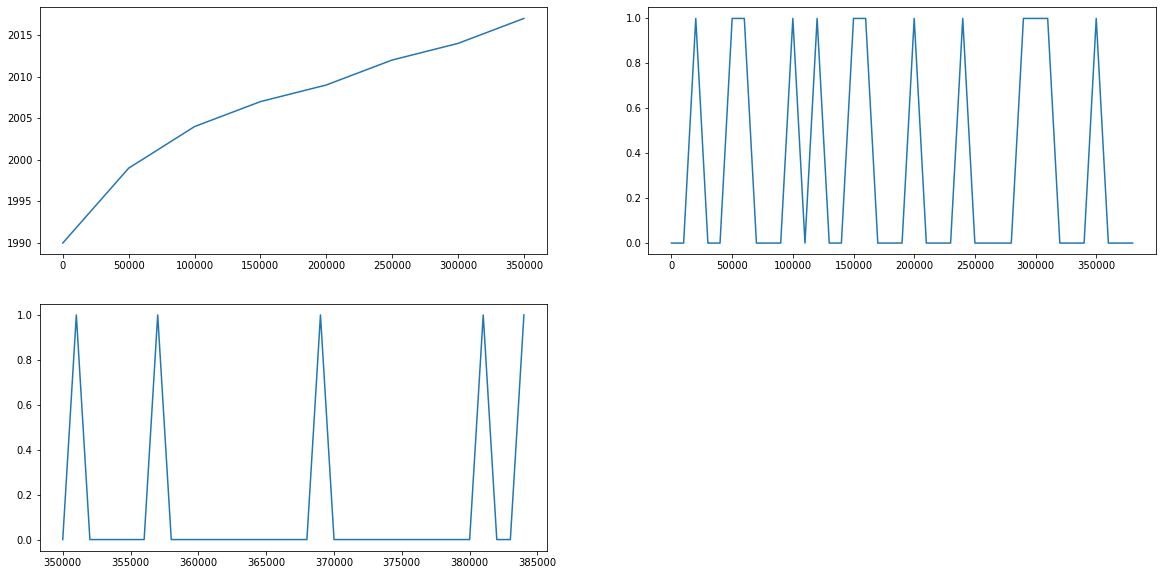

In [187]:
# kilka podwykresów

fig = plt.figure()
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)

elim_ch = data['elim_ch'][::10_000]
prelim_est = data['prelim_est'][350_000::1_000]

ax0.plot(years)
ax1.plot(elim_ch)
ax2.plot(prelim_est)

plt.savefig(os.path.join(folder, 'wykres2.svg'), dpi=400, bbox_inches='tight')

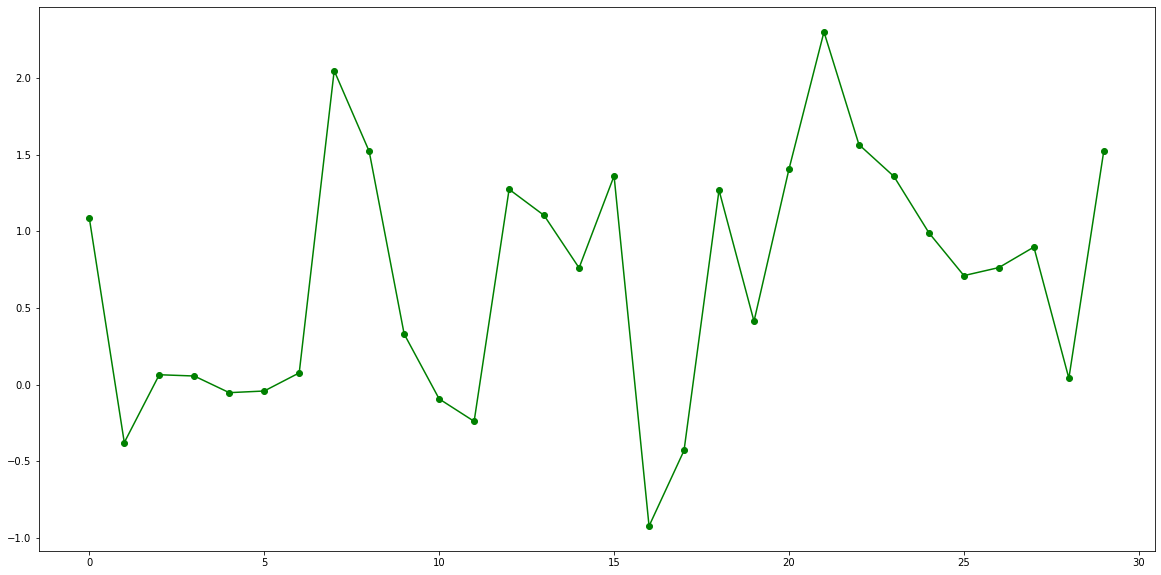

In [188]:
# wykres punktowy ze zdefiniowanymi kolorami, stylem znaczników i linii

from numpy.random import randn
plt.plot(randn(30).cumsum(), 'go-')
plt.savefig(os.path.join(folder, 'wykres3.svg'), dpi=400, bbox_inches='tight')

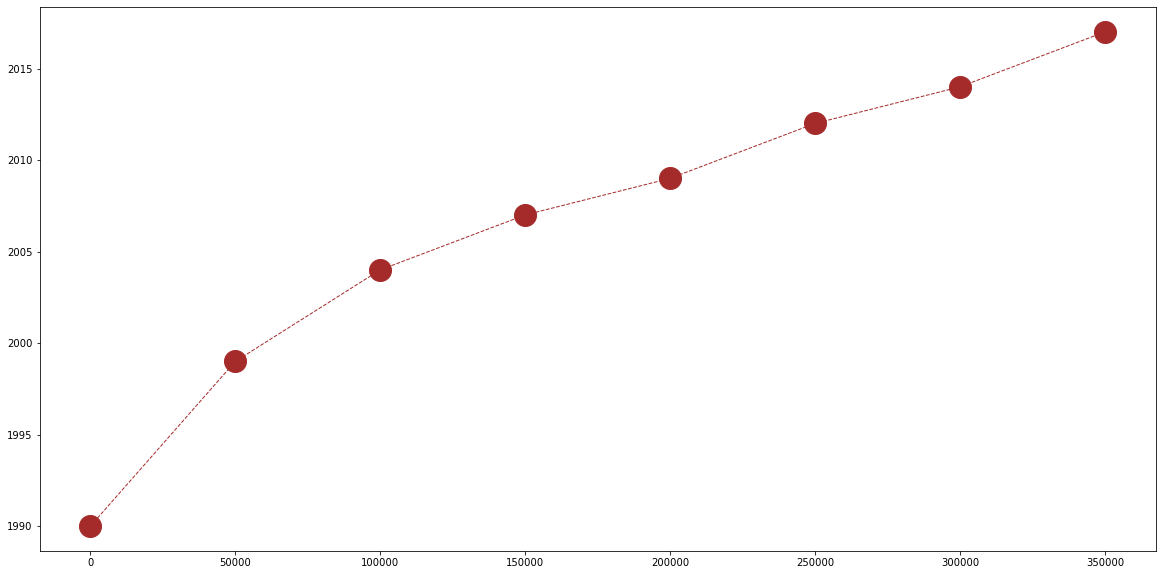

In [189]:
plt.plot(years, color='brown', marker='o', markersize=22, linestyle='--', linewidth=1)
plt.savefig(os.path.join(folder, 'wykres4.svg'), dpi=400, bbox_inches='tight')

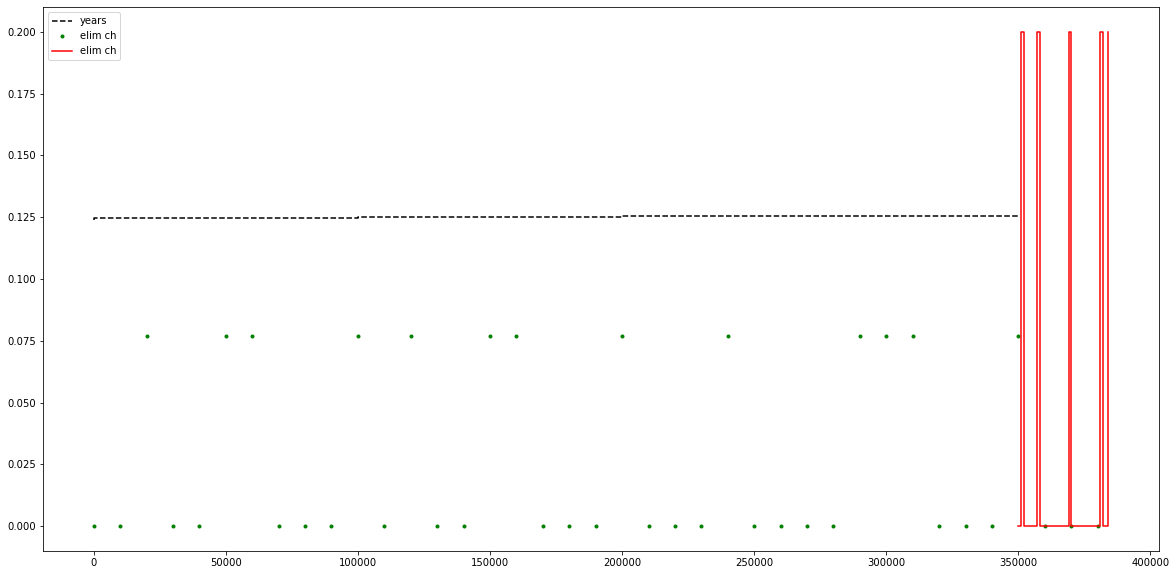

In [190]:
# wykres interpolacji liniowej

#data = np.random.randn(30).cumsum()
#plt.plot(data, 'k--', label='Etykieta')
#plt.plot(data, 'r-',  label="steps-post", drawstyle="steps-post")
#plt.legend(loc='best')

# normalizacja
years_normal = years.div(years.sum())
elim_ch_normal = elim_ch.div(elim_ch.sum())
prelim_est_normal = prelim_est.div(prelim_est.sum())

plt.plot(years_normal, 'k--', label='years', drawstyle='steps-pre')
plt.plot(elim_ch_normal, 'g.', label='elim ch', drawstyle='steps-mid')
plt.plot(prelim_est_normal, 'r-', label='elim ch', drawstyle='steps-post')
plt.legend(loc='best')

plt.savefig(os.path.join(folder, 'wykres5.svg'), dpi=400, bbox_inches='tight')

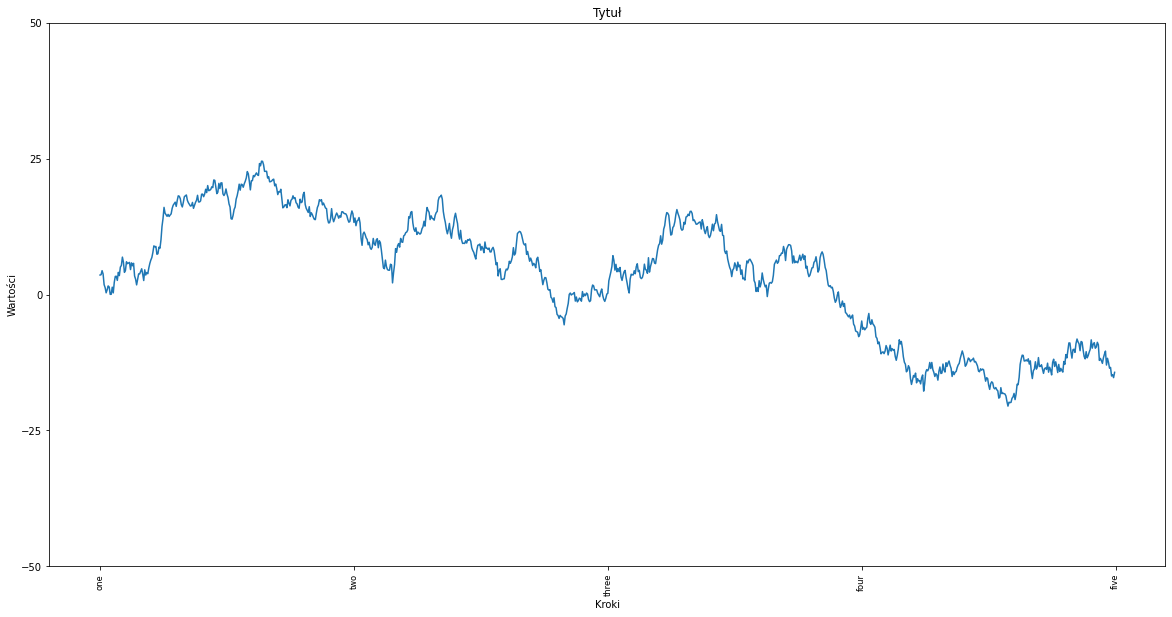

In [191]:
# dodanie etykiet na osi

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_yticks([-50, -25, 0, 25, 50])

ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=90, fontsize='small')

# dodanie właściwości wykresu słownikiem

props = {
    'title': "Tytuł",
    'xlabel': "Kroki",
    'ylabel': "Wartości"
}
ax.set(**props)

plt.savefig(os.path.join(folder, 'wykres6.svg'), dpi=400, bbox_inches='tight')

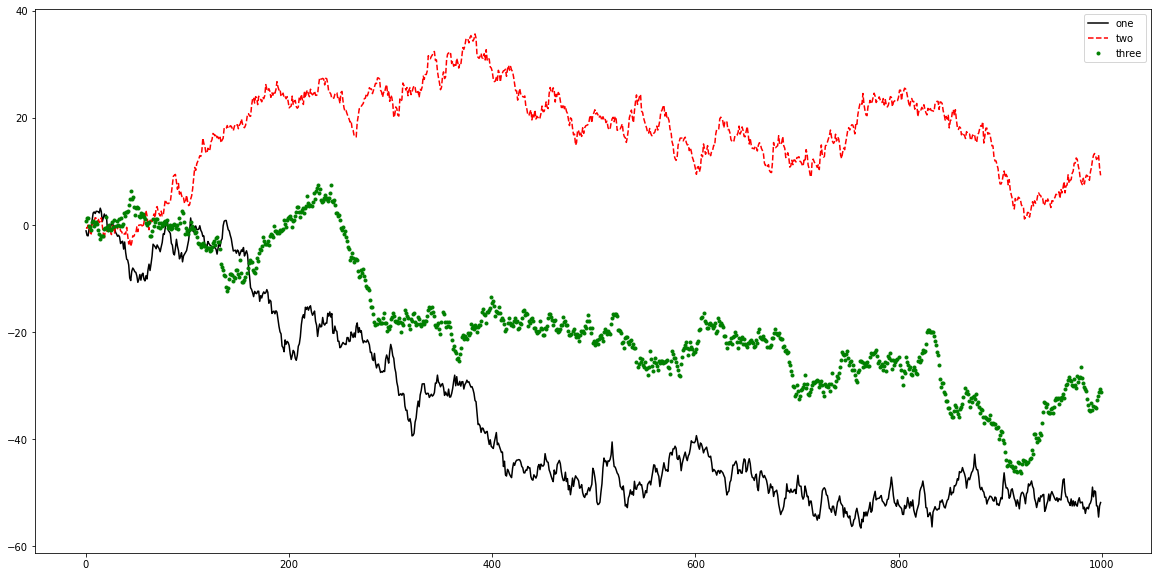

In [192]:
fig = plt.figure(); 
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'r--', label='two')
ax.plot(randn(1000).cumsum(), 'g.', label='three')
ax.legend(loc='best')

plt.savefig(os.path.join(folder, 'wykres7.svg'), dpi=400, bbox_inches='tight')

In [193]:
# zapis wykresu do pliku

path = r"C:\Users\piotr\Downloads\wykres01.svg"
plt.savefig(path, dpi=400, bbox_inches='tight')

<Figure size 1440x720 with 0 Axes>

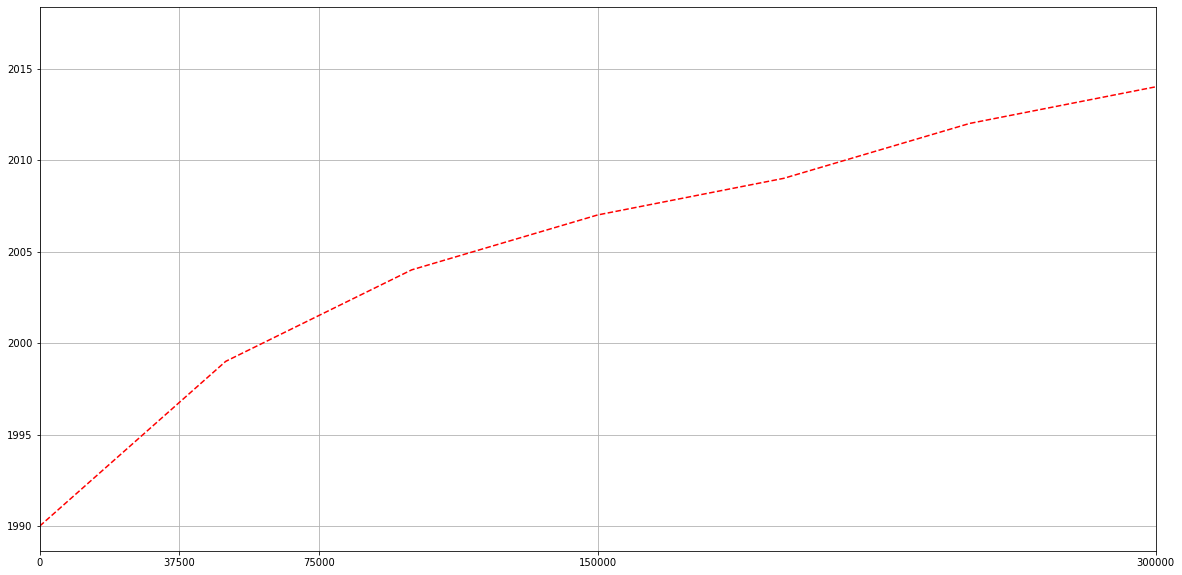

In [194]:
import numpy as np
import pandas as pd

xmax = 300_000

s = pd.Series(years, index=np.arange(0, xmax*50_000, 50_000))
s.plot(kind='line', logy=False, xticks=[0, xmax/8, xmax/4, xmax/2, xmax], xlim=[0, xmax], grid=True, style='r--')

plt.savefig(os.path.join(folder, 'wykres8.svg'), dpi=400, bbox_inches='tight')

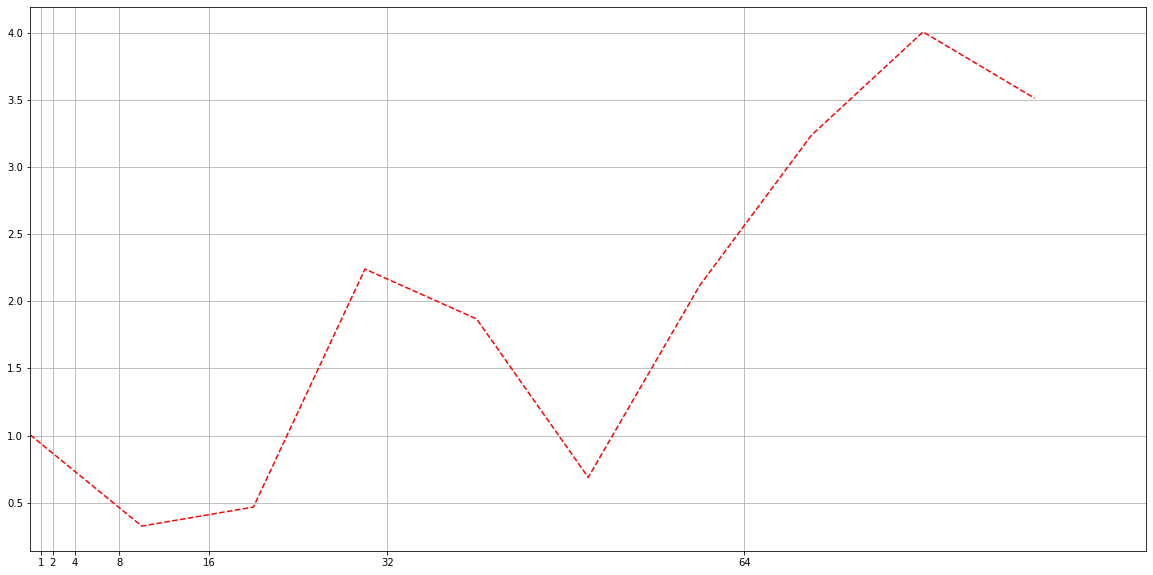

In [195]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(kind='line', logy=False, xticks=[1, 2, 4, 8, 16, 32, 64, 128], xlim=[0, 100], grid=True, style='r--')

plt.savefig(os.path.join(folder, 'wykres8.svg'), dpi=400, bbox_inches='tight')

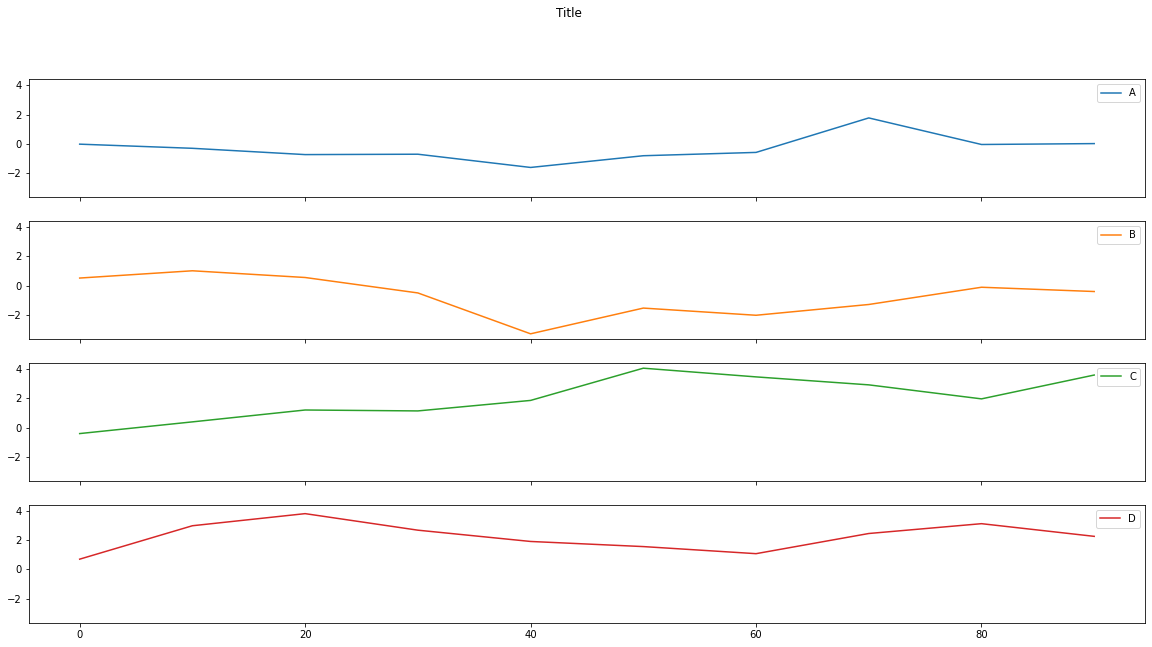

In [196]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot(subplots=True, sharex=True, sharey=True, title='Title', sort_columns=True)

plt.savefig(os.path.join(folder, 'wykres9.svg'), dpi=400, bbox_inches='tight')

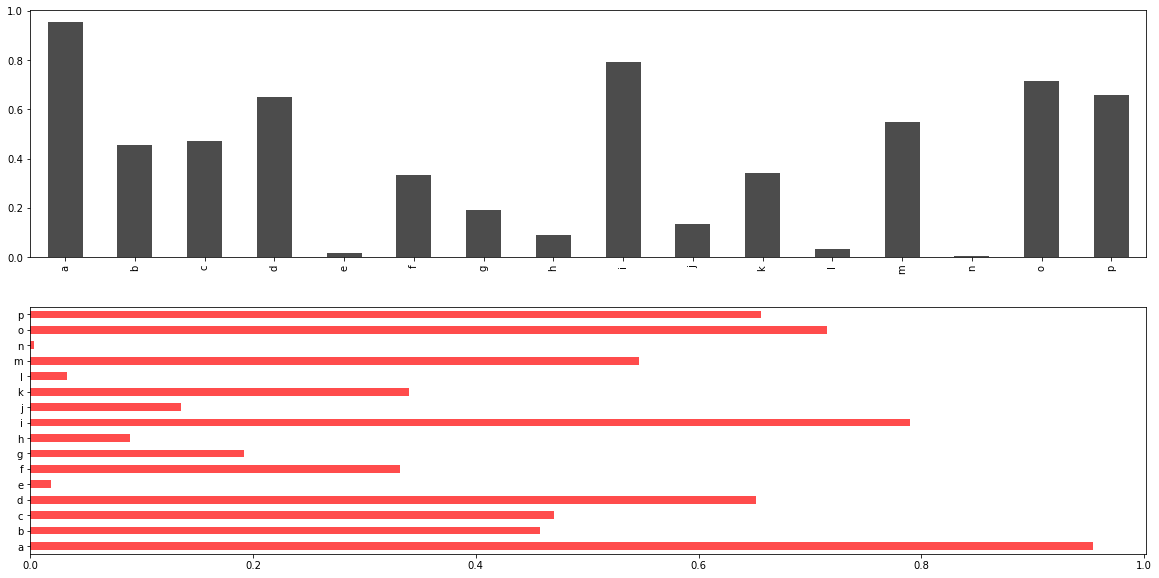

In [197]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='r', alpha=0.7)

plt.savefig(os.path.join(folder, 'wykres10.svg'), dpi=400, bbox_inches='tight')

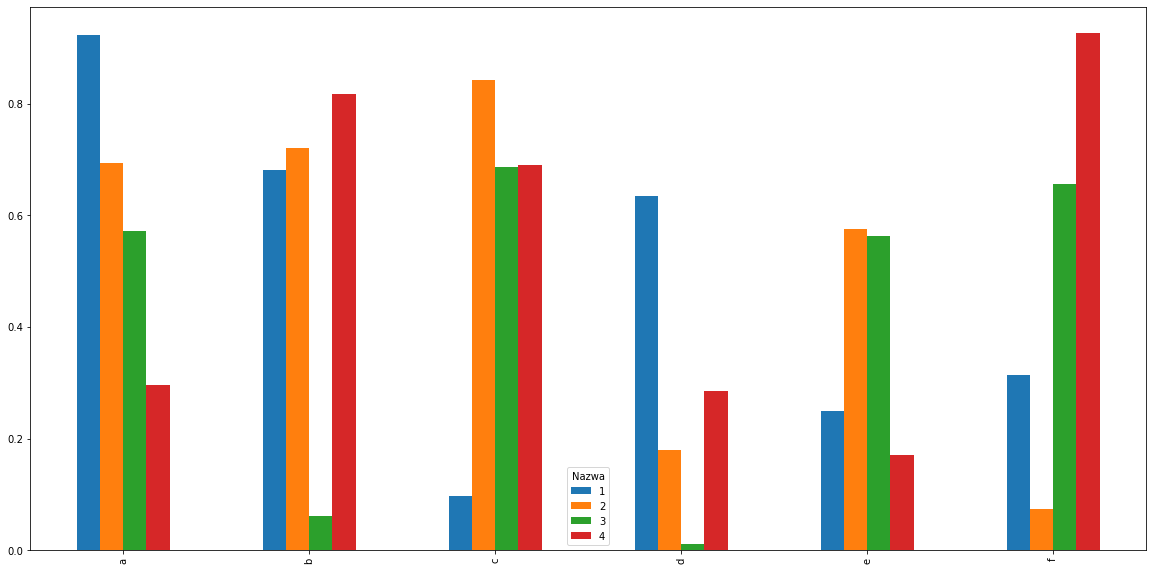

In [198]:
df = pd.DataFrame(np.random.rand(6, 4), index=['a', 'b', 'c', 'd', 'e', 'f'], columns=pd.Index(['1', '2', '3', '4'], name='Nazwa'))
df.plot.bar()

plt.savefig(os.path.join(folder, 'wykres11.svg'), dpi=400, bbox_inches='tight')

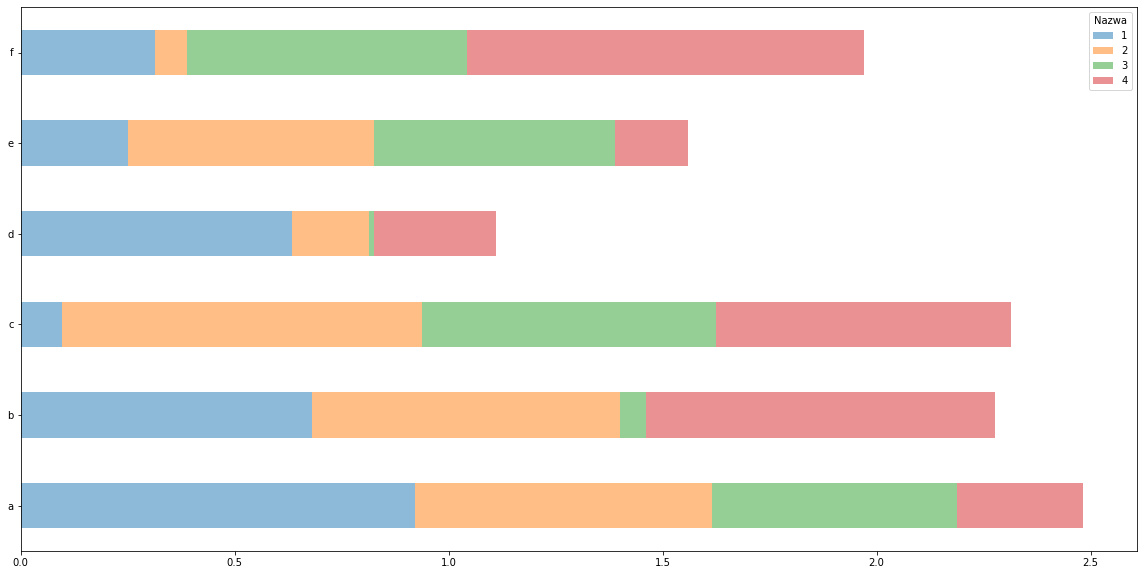

In [199]:
df.plot.barh(stacked=True, alpha=0.5)

plt.savefig(os.path.join(folder, 'wykres12.svg'), dpi=400, bbox_inches='tight')

In [200]:
n = 1_000

total_bill = [x * 100 for x in np.random.rand(n)]
tip = [x * (np.random.rand(1)[0]/10) for x in total_bill]
sex = np.random.choice(['Female', 'Male'], n)
smoker = np.random.choice(['yes', 'no'], n, p=[0.3, 0.7])
day = np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], n)
size = np.random.choice([np.arange(1, 7)][0], n)

tips = pd.DataFrame(
    { 
        'total_bill': total_bill, 
        'tip': tip, 
        'sex': sex, 
        'smoke': smoker,
        'day': day,
        'size': size
    })

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,34,31,31,24,29,26
Mon,23,19,33,18,23,20
Sat,36,22,20,26,21,17
Sun,25,23,26,19,15,20
Thu,15,28,28,23,20,24
Tue,23,35,21,23,25,24
Wed,20,17,27,23,18,25


In [201]:
# normalizacja wartości

party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.194286,0.177143,0.177143,0.137143,0.165714,0.148571
Mon,0.169118,0.139706,0.242647,0.132353,0.169118,0.147059
Sat,0.253521,0.154930,0.140845,0.183099,0.147887,0.119718
Sun,0.195312,0.179688,0.203125,0.148438,0.117188,0.156250
Thu,0.108696,0.202899,0.202899,0.166667,0.144928,0.173913
Tue,0.152318,0.231788,0.139073,0.152318,0.165563,0.158940
Wed,0.153846,0.130769,0.207692,0.176923,0.138462,0.192308


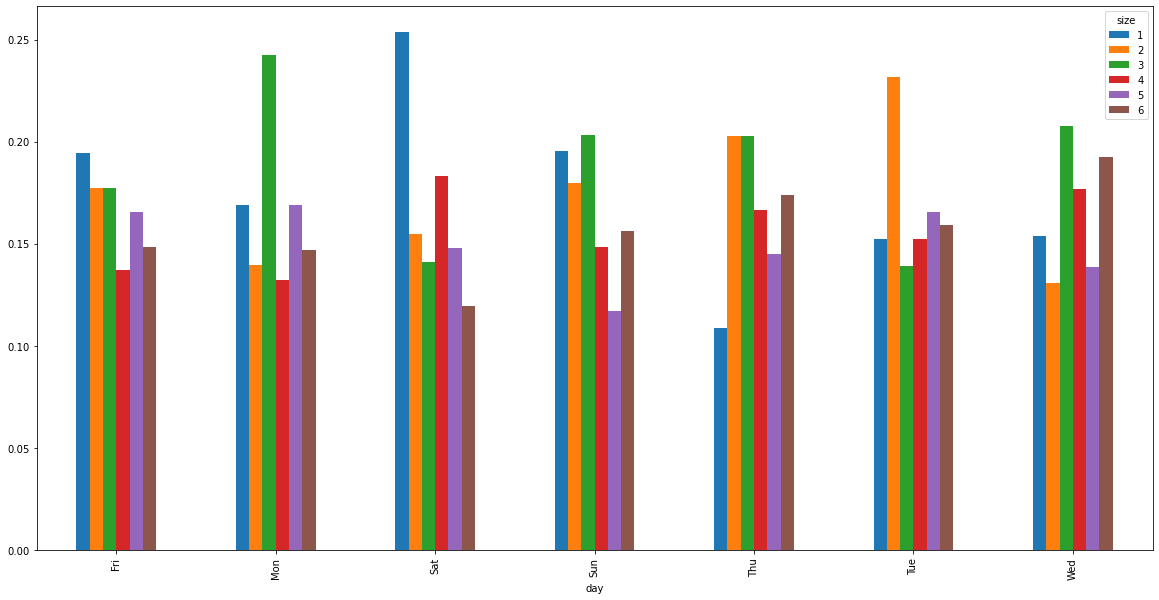

In [202]:
party_pcts.plot.bar()

plt.savefig(os.path.join(folder, 'wykres13.svg'), dpi=400, bbox_inches='tight')

In [203]:
import seaborn as sns

In [204]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,sex,smoke,day,size,tip_pct
0,69.296745,0.391836,Male,no,Fri,1,0.005687
1,40.640074,3.475846,Male,yes,Thu,6,0.093527
2,93.682971,1.488053,Female,yes,Sat,1,0.016140
3,93.526139,6.958112,Male,yes,Wed,1,0.080377
4,42.114025,1.489238,Male,no,Sun,3,0.036658
...,...,...,...,...,...,...,...
995,16.267530,0.495509,Male,no,Wed,3,0.031417
996,93.816534,1.111831,Female,no,Tue,5,0.011993
997,11.698924,1.165152,Male,no,Sat,5,0.110611
998,47.437602,2.072060,Female,yes,Fri,1,0.045675


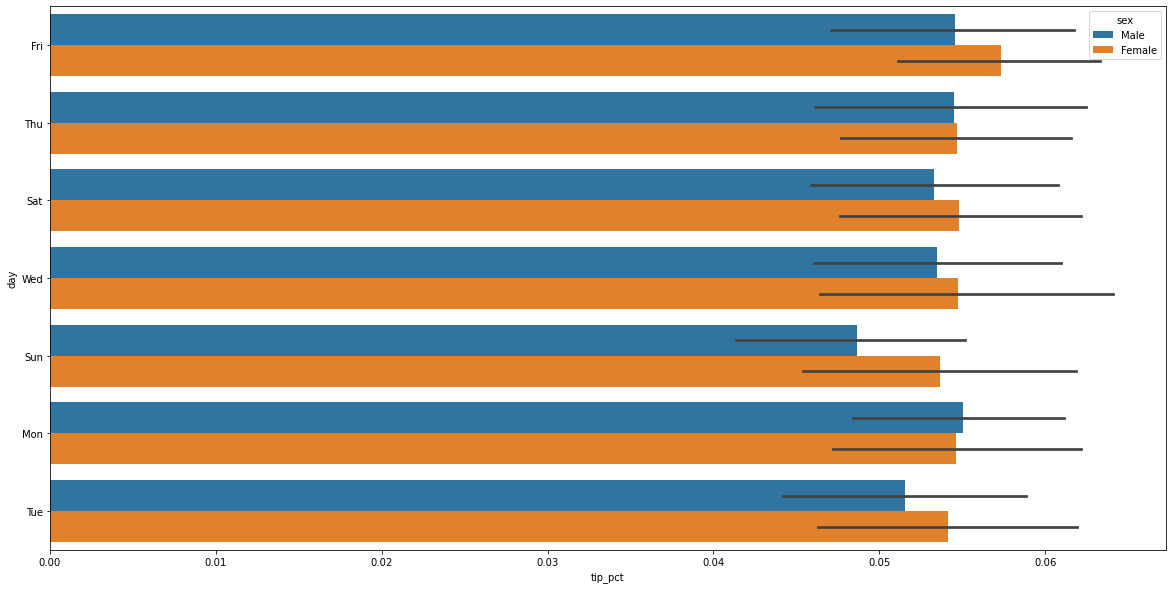

In [205]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', hue='sex')

plt.savefig(os.path.join(folder, 'wykres14.svg'), dpi=400, bbox_inches='tight')

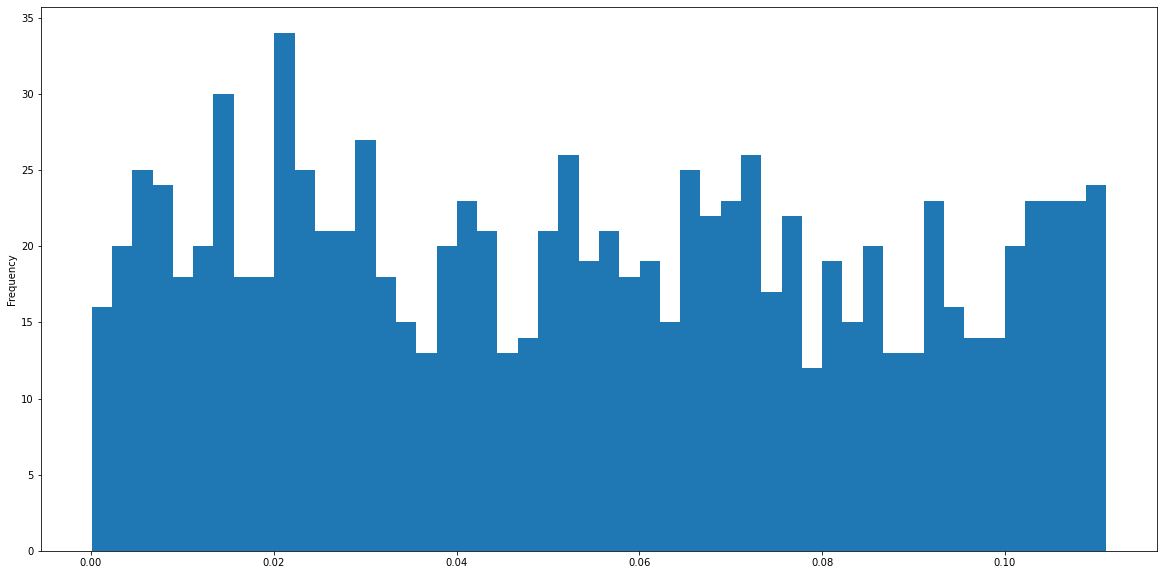

In [206]:
# histogram
tips['tip_pct'].plot.hist(bins=50)

plt.savefig(os.path.join(folder, 'wykres15.svg'), dpi=400, bbox_inches='tight')

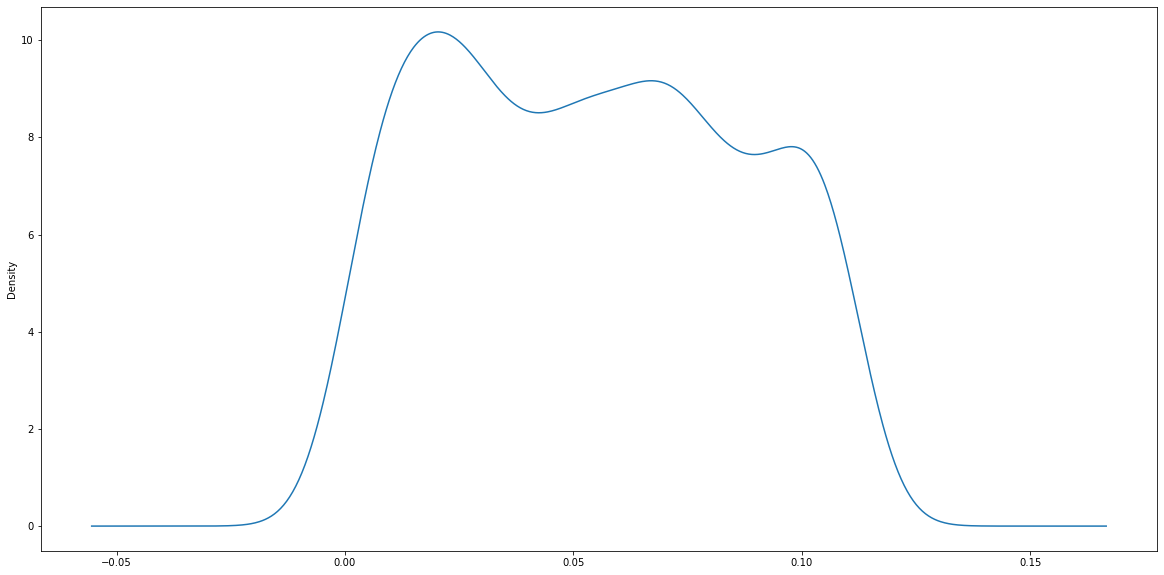

In [207]:
# wykres gęstości

tips['tip_pct'].plot.kde()

plt.savefig(os.path.join(folder, 'wykres16.svg'), dpi=400, bbox_inches='tight')

C:\Users\piotr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


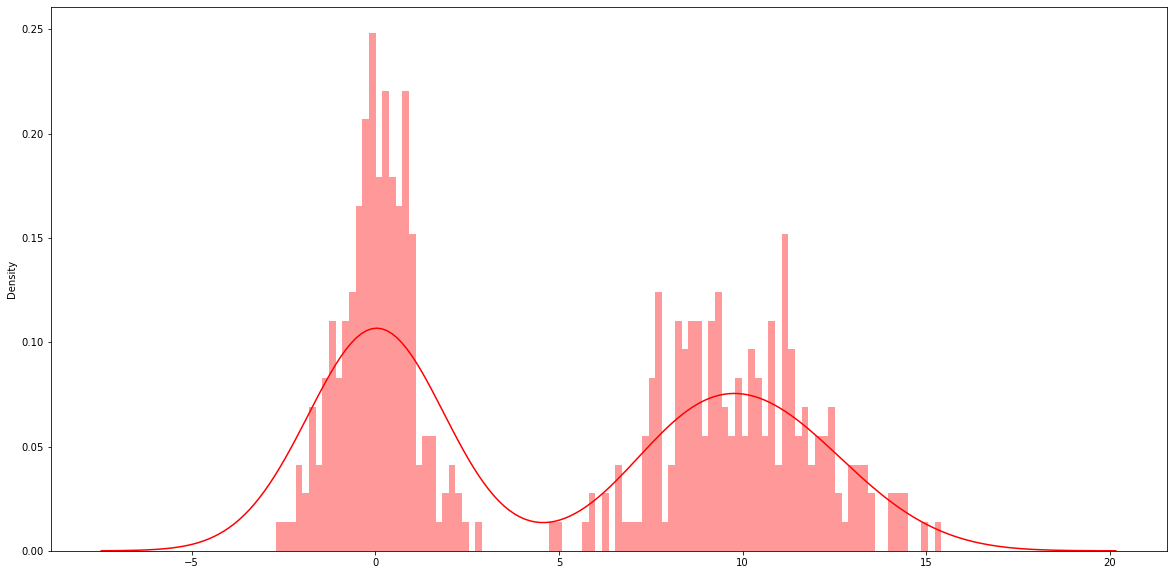

In [208]:
# histogram i wykres gęstości na jednym wykresie
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

vals = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(vals, bins=100, color='r')

plt.savefig(os.path.join(folder, 'wykres17.svg'), dpi=400, bbox_inches='tight')

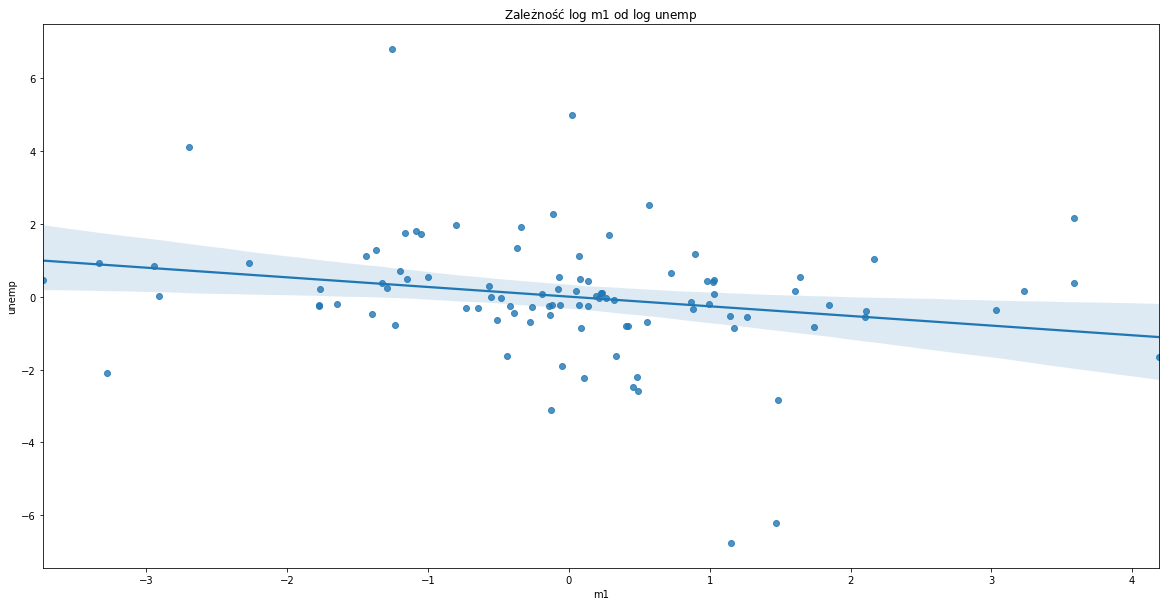

In [209]:
# wykresy pudełkowe

n = 100

data = pd.DataFrame({
    'cpi': np.random.rand(n),
    'm1': np.random.rand(n), 
    'tbilrate': np.random.rand(n),
    'unemp': np.random.rand(n)
})

# różnice logarytmów
trans_data = np.log(data).diff().dropna()

sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Zależność $\log$ {} od $\log$ {}'.format('m1', 'unemp'))

plt.savefig(os.path.join(folder, 'wykres18.svg'), dpi=400, bbox_inches='tight')

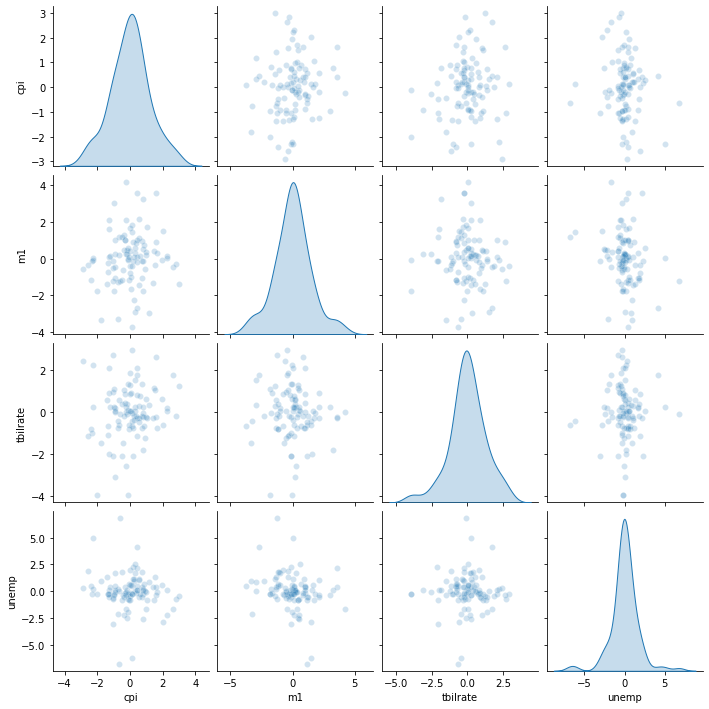

In [210]:
# wszystkie wykresy rozrzutu

sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

plt.savefig(os.path.join(folder, 'wykres19.svg'), dpi=400, bbox_inches='tight')

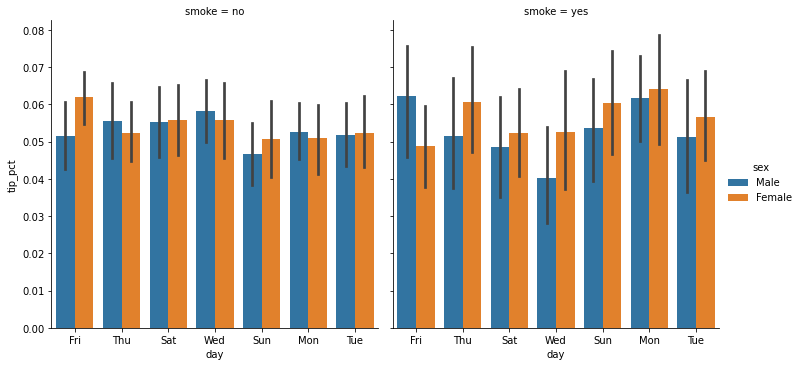

In [211]:
# kilka wykresów słupkowych obok siebie (tzw. faset)

sns.catplot(x='day', y='tip_pct', hue='sex', col='smoke', kind='bar', data=tips[tips.tip_pct < 1])

plt.savefig(os.path.join(folder, 'wykres20.svg'), dpi=400, bbox_inches='tight')

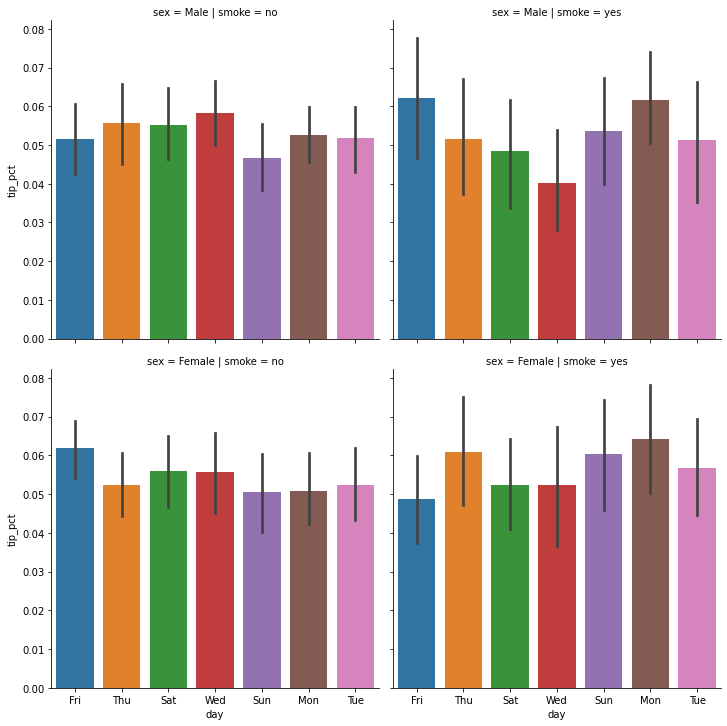

In [212]:
# łączenie warunków wyświetlania faset

sns.catplot(x='day', y='tip_pct', row='sex', col='smoke', kind='bar', data=tips[tips.tip_pct < 1])

plt.savefig(os.path.join(folder, 'wykres21.svg'), dpi=400, bbox_inches='tight')

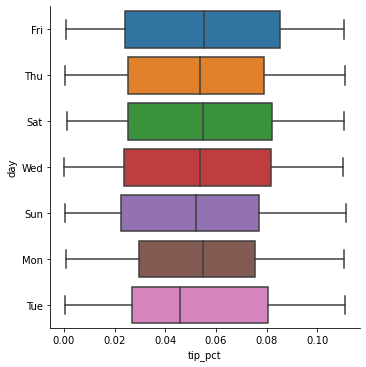

In [213]:
# wykresy pudełkowe

sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

plt.savefig(os.path.join(folder, 'wykres22.svg'), dpi=400, bbox_inches='tight')